In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import glob
import h5py
import flammkuchen as fl

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from fig_2_helper import color_ipsi_cont

### Load data

In [4]:
save_figure_path = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_2\fig_2')

In [5]:
master_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')
path_tensors = Path(master_path/ 'tensors' /'tensor_ipsi_contra_pos.h5')
path_features = Path(master_path/ 'features_ipsi_contra.csv')
master_path, path_features

(WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data'),
 WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features_ipsi_contra.csv'))

In [6]:
features = pd.read_csv(path_features)
features.head()

,Unnamed: 0.1,Unnamed: 0,exp,fish_id,bout_angle,cluster,frame_start,frame_end,bout_id_orig,mb_proba,...,ipsi_peak_vigor,contra_peak_vigor,ipsi_freqs,contra_freqs,ipsi_osc,contra_osc,ipsi_duration,contra_duration,ipsi_max_freqs,contra_max_freqs
0,0,0,13052024_visstim_2D_round,240513_f0,3.000171,0,18375,18410,78,0.806645,...,0.244681,0.164076,0.109756,0.105263,4,3,28.0,27.0,0.166667,0.166667
1,1,1,13052024_visstim_2D_round,240513_f0,1.649302,0,19461,19484,80,1.000000,...,0.163745,0.128555,0.119048,0.117647,2,2,19.0,15.0,0.250000,0.166667
2,2,2,13052024_visstim_2D_round,240513_f0,-0.861132,0,19661,19689,81,1.000000,...,0.219439,0.184779,0.104167,0.115385,3,2,27.0,16.0,0.125000,0.166667
3,3,3,13052024_visstim_2D_round,240513_f0,0.870591,0,20257,20292,84,1.000000,...,0.209418,0.198009,0.117647,0.117647,4,2,35.0,16.0,0.125000,0.166667
4,4,4,13052024_visstim_2D_round,240513_f0,2.231631,0,20824,20859,86,1.000000,...,0.220615,0.185247,0.103448,0.116667,3,3,22.0,23.0,0.125000,0.125000


## Leading fin plot

In [7]:
leading_fin = features.leading_fin.values
ipsi_fin = features.ipsi_fin.values

## Synchronicity

In [8]:
l_periods_array = fl.load(master_path/ 'features'/ 'l_full_beats.h5')
l_half_beats_array = fl.load(master_path/ 'features'/ 'l_half_beats.h5')

r_periods_array = fl.load(master_path/ 'features'/ 'r_full_beats.h5')
r_half_beats_array = fl.load(master_path/ 'features'/ 'r_half_beats.h5')

### Fin Beat Duration for ipsi and contralateral fins

In [9]:
## convert to ms
l_periods_array = l_periods_array*1000
r_periods_array = r_periods_array*1000

In [10]:
alph=0.2
lw=0.5
cm = 1/2.54  # centimeters in inches
f_size = 6
dpi=600

n_phases = 2
dt = 0.005
bins = np.arange(0, 100, 10)

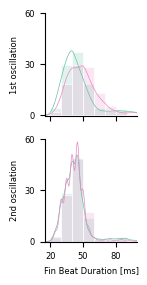

In [11]:

fig, axes = plt.subplots(n_phases,1, figsize=(4*cm, 7.5*cm), sharex=True, sharey=True, facecolor='None')
axes = axes.ravel()

for i in range(n_phases):
    data_ipsi = np.concatenate([l_periods_array[ipsi_fin ==0][:, i], r_periods_array[ipsi_fin ==1][:, i]])
    data_contra = np.concatenate([l_periods_array[ipsi_fin ==1][:, i], r_periods_array[ipsi_fin ==0][:, i]])
    sns.histplot(data=data_ipsi, color=color_ipsi_cont[0],  bins=bins, stat='percent', kde=True, alpha=alph,  edgecolor='w', ax=axes[i],label= 'ipsilateral')
    ax = sns.histplot(data=data_contra, color= color_ipsi_cont[1],  bins=bins, stat='percent', kde=True, alpha=alph, edgecolor='w', ax=axes[i], label= 'contralateral')
    for line in ax.get_lines():
        line.set_linewidth(lw)  # Set the desired line width here

axes[-1].set_xlabel('Fin Beat Duration [ms]', fontsize=f_size)
axes[0].set_ylabel('1st oscillation', fontsize=f_size)
axes[1].set_ylabel('2nd oscillation', fontsize=f_size)
axes[0].set_xlim(0, 0.1)
axes[0].set_xlim(15, 100)
axes[0].set_ylim(-0.1, 60)

for ax in axes:
    ax.set_yticks(np.arange(0,61,30))
    ax.set_yticklabels(np.arange(0,61,30), fontsize=f_size)
    ax.set_xticks(np.arange(20,90,30))
    ax.set_xticklabels(np.arange(20,90,30), fontsize=f_size)
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.title.set_color('black')
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')
    
sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()

fig.savefig(save_figure_path/ 'peak_to_peak_fins_.pdf', dpi=dpi)
fig.savefig(save_figure_path/ 'peak_to_peak_fins_.png', dpi=dpi)